SIR model for Covid19

In [2]:
function iterateSIR(nvector)
    susceptible = nvector[1];
    infected = nvector[2];
    removed = nvector[3];
    newsusceptible = susceptible - lambda*susceptible*infected*dt
    newinfected = infected + lambda*susceptible*infected*dt - gam*infected*dt
    newremoved = removed + gam*infected*dt
    return [newsusceptible newinfected newremoved]
end

iterateSIR (generic function with 1 method)

SIR - susceptible infected removed model for covid19
s(t) = no. of susceptible at time t.
s(0) = no. of susceptible at start of epidemic.
i(t) and r(t) respectively infected and removed at time t.
Remove - The people previously infected but no longer infectious.
using principle -
 New_value = Old_value + gain - losses
 
By the 'low of mass action' no. of meeting of infected and susceptibles is propotional to S.I.
so losses = lambda.S.I.dt (over the time step).
1. s(t+1) = s(t) - lambda.s(t).i(t).dt
2. i(t+1) = i(t) + lambda.s(t).i(t).dt - gamma.i(t).dt
3. r(t+1) = r(t) + gamma.i(t).dt
here gamma is removed from the infacteds per days.
loss of susceptible is gain for infecteds.
loss rate of infacted people is just a constant probability of recovery.

In [9]:
#setting parameter values
lambda = 460/100000. #infection rate parameter(perday)
gam = 1/14. #recovery rate parameter (perday)
dt = 0.5  #time step length in days
tfinal = 450.; #total no. of days
s0 = 3*10^9. #susceptable population at starting epidemic 
i0 = 36*10^5.    #infcated population 
r0 = 14*10^5.    #removed population  
nsteps = round(Int64, tfinal/dt)  #number of steps it will be iterate by per given time step 
resultvalus = Array{Float64}(undef, nsteps+1, 3) #array holds susceptables, infecteds, removed in each row with each time step
timevector = Array{Float64}(undef, nsteps+1) #time steps stored in this array with respect of resultvalues
resultvalus[1,:] = [s0,i0,r0]
timevector[1] = 0.
#iterating values from initial values of SIR
for step = 1:nsteps
    resultvalus[step+1,:] = iterateSIR(resultvalus[step,:])
    timevector[step+1] = timevector[step]+dt
end

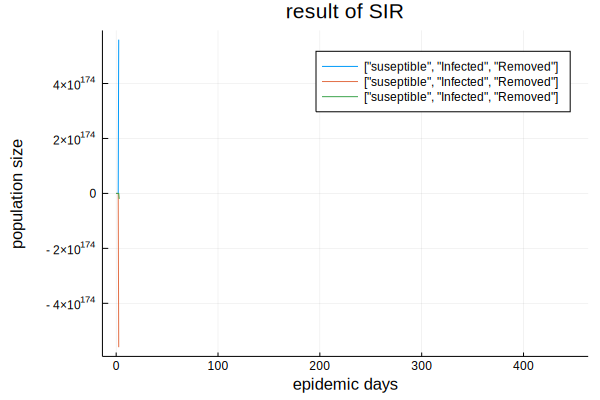

In [10]:
using Plots
gr()
plot(timevector, resultvalus,
title = "result of SIR",
xlabel = "epidemic days",
ylabel = "population size",
label = ["suseptible","Infected","Removed"])

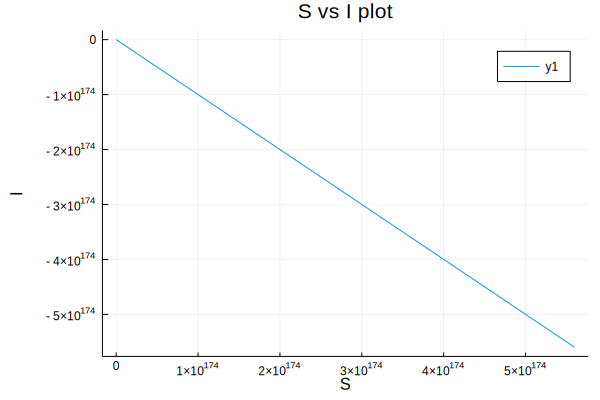

In [11]:
sval = resultvalus[:,1];
ival = resultvalus[:,2];
plot(sval,ival,
title = "S vs I plot ",
xlabel = "S",
ylabel = "I")

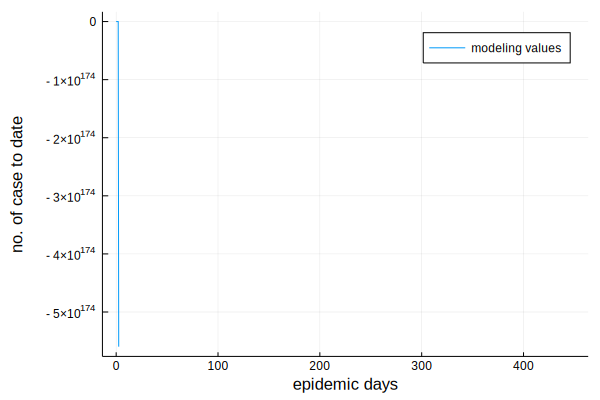

In [12]:
rval = resultvalus[:,3];
cval = ival + rval
plot(timevector,cval,label = "modeling values",xlabel="epidemic days",
ylabel="no. of case to date")
#plot!(tvalusfromdataasdays, totalcasesfromdatagivendays, legend = :right, line = :scatter, label = "Reported number of cases")